# Titanic - Machine Learning from Disasters

This Kaggle competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

This competition and dataset can be found at https://bit.ly/3iHzHw5

![image](imgs/titanic_top_image.jpg)

### Tasks

1 - Importing datasets<br/>
2 - Treatment of missing values<br/>
3 - Identifying the relevance of variables<br/>
4 - Creating new variables<br/>
5 - Excluding irrelevant variables<br/>
6 - Transforming categorical data into numeric data<br/>
7 - Creating the predictive model<br/>
8 - Testing the possibilities

# 1 - Importing datasets

In [1]:
# Data manipulation libs
import pandas as pd
import numpy as np

# Visualization libs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('data/train.csv')
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X_test = pd.read_csv('data/test.csv')
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### <center>Description of the variables</center>
![image](imgs/variables_description.png)

# 2 - Treatment of missing values

<b>Training data</b>

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PS: It is noticed here that the columns "Age", "Embarked" and "Cabin" have some null data, therefore, it is necessary to treat them.

<b>Test data</b>

In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PS: It is noticed here that the columns "Age", "Fare" and "Cabin" have some null data, therefore, it is necessary to treat them.

In [6]:
full_data = [X_train, X_test]

## 2.1 - Age (train and test)

To treat the null values (nan) of <b>Age</b> we can: <br/>
    - Replace them with the arithmetic average of non-nulls ages;
    - Replace them with randomly generated numbers between mean-standard deviation and mean+standard deviation.

In this case, I will choose the second option, as I aim to divide ages into intervals in the future and that way we would have a greater distribution of age data.

In [7]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][dataset['Age'].isnull()] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\Denis\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 2.2 - Embarked (train)

There are only 2 null values in the "Embarked" variable, so we will replace it with the mode.

In [8]:
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace = True)

## 2.3 - Fare (test)

To handle the values of <b>Fare</b> we can:

    - Replace with average;
    - Replace with median.

In this case we will replace with median, beacause it is already an existing fare value.

In [9]:
X_test['Fare'].fillna(X_test['Fare'].median(), inplace = True)

## 2.4 - Cabin (train e test)

In [10]:
X_train['Cabin'].notnull().sum()

204

In [11]:
X_test['Cabin'].notnull().sum()

91

In [12]:
len(pd.concat([X_train['Cabin'], X_test['Cabin']]))

1309

In [13]:
pd.concat([X_train['Cabin'], X_test['Cabin']]).notnull().sum()

295

In [14]:
295/1309

0.22536287242169595

This column must be excluded because it has only 22.5% of non-null values.

# 3 - Identifying the relevance of variables

In [15]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## 3.1 - PassengerId

In [16]:
X_train['PassengerId'].nunique()

891

It is noticed that this column will have no impact on the model, because it is a primary key, therefore, the value is not repeated, so it will be discarded.

## 3.2 - Pclass

![image](imgs/titanic_class_distribuition.png)

From the graph below we can see that this is a very relevant variable for the survival of a passenger.

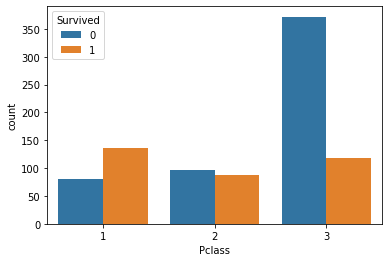

In [17]:
sns.countplot(data = X_train, x='Pclass', hue='Survived')

1st class = Majority survived <br/>
2nd class = More people survived than died <br/>
3rd class = Approximately 3x more people died than survived <br/>

## 3.3 - Name

In [18]:
X_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
X_train['Name'].nunique()

891

The variable <b>Name</b> is not statistically relevant to the model, but we will extract the title from each name.

## 3.4 - Sex

Sex is also an extremely relevant variable for survival.

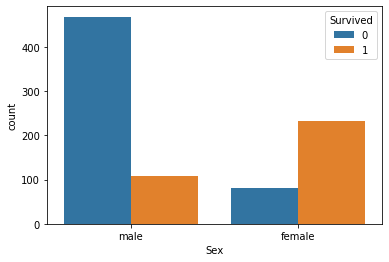

In [20]:
sns.countplot(data = X_train, x='Sex', hue='Survived')

Male = Male die about 5x more than they survive <br/>
Female = Female survived about 2.5x more than dying <br/>

## 3.5 - Age

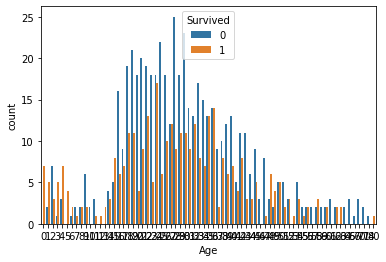

In [21]:
sns.countplot(data = X_train, x='Age', hue='Survived')

In [22]:
X_train['Age'].nunique()

71

We can transform this numeric column into a categorical column:
    - Dividing ages into numerical intervals;
    - Dividing into age classes (child, teenager, adult, elderly).

## 3.6 - SibSp

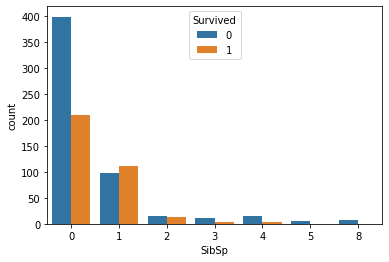

In [23]:
sns.countplot(data = X_train, x='SibSp', hue='Survived')

There is no uniform relationship between the values, but it can be reworked

## 3.7 - Parch

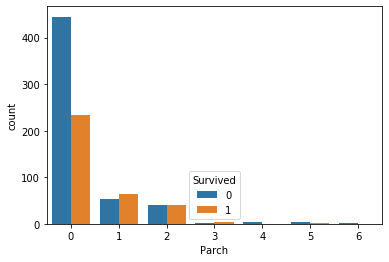

In [24]:
sns.countplot(data = X_train, x='Parch', hue='Survived')

There is no uniform relationship between the values, but it can be reworked

## 3.7 - Ticket

It is noticed that the number of unique values ​​present in Ticket is very large, therefore, it will not add value in the prediction.

In [25]:
X_train['Ticket'].nunique()

681

Ticket will be discarded from the model

## 3.8 - Fare

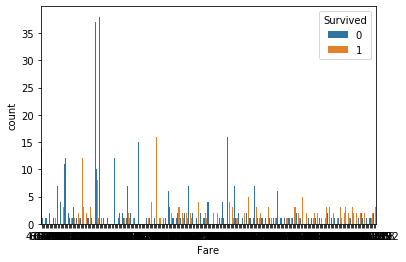

In [26]:
sns.countplot(data = X_train, x='Fare', hue='Survived')

We can transform this numeric column into a categorical column:
     - Dividing Fare into numerical intervals.

## 3.9 - Embarked

If we look at the graph below, the "Embarked" variable proves to be relevant to the model.

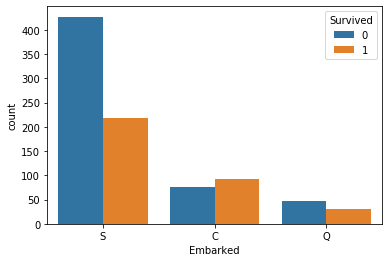

In [27]:
sns.countplot(data = X_train, x='Embarked', hue='Survived')

# 4 - Creating new variables

In [28]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## 4.1 - CategoricalAge

Variable that will divide <b>Age</b> into 5 different intervals.

In [29]:
X_train['Age'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [30]:
for dataset in full_data:
    dataset['CategoricalAge'] = pd.cut(dataset['Age'], bins = 5)

In [31]:
print (X_train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean().sort_values(by='Survived', ascending=False))

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.522124
3   (48.0, 64.0]  0.434783
2   (32.0, 48.0]  0.374016
1   (16.0, 32.0]  0.353604
4   (64.0, 80.0]  0.090909


## 4.2 - CategoricalFare

Variable that will divide <b>Fare</b> into 4 different intervals.

In [32]:
X_train['Fare'].sort_values().unique()

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [33]:
for dataset in full_data:
    dataset['CategoricalFare'] = pd.qcut(dataset['Fare'], q = 4)

In [34]:
print (X_train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   CategoricalFare  Survived
3  (31.0, 512.329]  0.581081
2   (14.454, 31.0]  0.454955
1   (7.91, 14.454]  0.303571
0   (-0.001, 7.91]  0.197309


## 4.3 - Title

The "Title" variable will receive only the titles present in the existing "Name" variable, which differentiates passengers through their social and educational classes.

In [35]:
import re

In [36]:
# extracts the title from the passenger's name
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

In [37]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [38]:
X_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Mme           1
Ms            1
Sir           1
Jonkheer      1
Countess      1
Don           1
Lady          1
Name: Title, dtype: int64

In [39]:
X_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

We will group the titles that appear little in Rare

In [40]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(
        ['Dr', 'Rev', 'Major', 'Col', 'Sir', 'Don', 'Countess', 'Lady', 'Jonkheer', 'Capt', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms', 'Mme'], 'Miss')
    
print (X_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False))

    Title  Survived
3     Mrs  0.792000
1    Miss  0.704301
0  Master  0.575000
4    Rare  0.347826
2      Mr  0.156673


## 4.4 - FamilySize

As mentioned earlier, the "SibSp" and "Parch" variables are not as relevant, but we can create a variable that determines the total size of the family on the Titanic.

In [41]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [42]:
X_train['FamilySize'].sort_values().value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [43]:
print (X_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


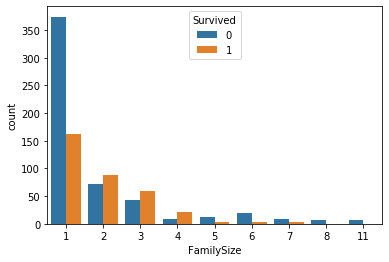

In [44]:
sns.countplot(x=X_train['FamilySize'], hue=X_train['Survived'])

In [45]:
X_train['FamilySize'].corr(X_train['Survived'])

0.01663898928274532

Both by the graph and by the low correlation, we noticed that the variable "FamilySize" also has little deterministic value for the target "Survived".

## 4.5 - IsAlone

We created the variable "IsAlone", because that way we will simplify the use of the variable "FamilySize", determining only if the person was alone or not inside the ship.

In [46]:
for dataset in full_data:
    dataset['IsAlone'] = 1
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0

### How is our Data Frame at the moment

In [47]:
full_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge,CategoricalFare,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]","(-0.001, 7.91]",Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]","(31.0, 512.329]",Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]","(7.91, 14.454]",Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,"(32.0, 48.0]","(31.0, 512.329]",Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]","(7.91, 14.454]",Mr,1,1


# 5 - Excluding irrelevant variables

We now exclude all variables that we determined to be irrelevant to the model.

In [48]:
PassengerId_test = X_test['PassengerId']

In [49]:
to_drop = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'FamilySize']

In [50]:
for dataset in full_data:
    dataset.drop(labels = to_drop, axis = 1, inplace = True)

In [51]:
full_data[0].head()

,Survived,Pclass,Sex,Embarked,CategoricalAge,CategoricalFare,Title,IsAlone
0,0,3,male,S,"(16.0, 32.0]","(-0.001, 7.91]",Mr,0
1,1,1,female,C,"(32.0, 48.0]","(31.0, 512.329]",Mrs,0
2,1,3,female,S,"(16.0, 32.0]","(7.91, 14.454]",Miss,1
3,1,1,female,S,"(32.0, 48.0]","(31.0, 512.329]",Mrs,0
4,0,3,male,S,"(32.0, 48.0]","(7.91, 14.454]",Mr,1


## 6 - Transforming categorical data into numeric data

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

To calculate the correlation we will need to organize the columns to transform all data into numerics

In [54]:
# Organizing the "full_data[0]" columns
cols = ['Pclass',
        'Sex',
        'Embarked',
        'CategoricalAge',
        'CategoricalFare',
        'Title',
        'IsAlone',
        'Survived']

full_data[0] = full_data[0][cols]

In [55]:
for dataset in full_data:
    for i in [1, 2, 3, 4, 5]:
        dataset.iloc[:,i] = le.fit_transform(dataset.iloc[:,i])

By the correlation we can see that the variable "Sex" is the most relevant for the target "Survived".

In [56]:
full_data[0].corr()

,Pclass,Sex,Embarked,CategoricalAge,CategoricalFare,Title,IsAlone,Survived
Pclass,1.000000,0.131900,0.162098,-0.324023,-0.634271,-0.176783,0.135207,-0.338481
Sex,0.131900,1.000000,0.108262,0.091868,-0.243613,0.064185,0.303646,-0.543351
Embarked,0.162098,0.108262,1.000000,-0.017476,-0.098593,0.010744,0.063532,-0.167675
CategoricalAge,-0.324023,0.091868,-0.017476,1.000000,0.079699,0.446801,0.130530,-0.056846
CategoricalFare,-0.634271,-0.243613,-0.098593,0.079699,1.000000,0.030896,-0.560279,0.299357
Title,-0.176783,0.064185,0.010744,0.446801,0.030896,1.000000,0.015303,-0.074812
IsAlone,0.135207,0.303646,0.063532,0.130530,-0.560279,0.015303,1.000000,-0.203367
Survived,-0.338481,-0.543351,-0.167675,-0.056846,0.299357,-0.074812,-0.203367,1.000000


In [57]:
X_train, X_test = full_data

In [58]:
y_train = X_train['Survived']
X_train.drop('Survived', axis = 1, inplace = True)

In [59]:
X_train.head()

,Pclass,Sex,Embarked,CategoricalAge,CategoricalFare,Title,IsAlone
0,3,1,2,1,0,2,0
1,1,0,0,2,3,3,0
2,3,0,2,1,1,1,1
3,1,0,2,2,3,3,0
4,3,1,2,2,1,2,1


# 7 - Creating the predictive model

We will create different Machine Learning algorithms to test the accuracy of each one and identify which one best applies to our goal

## Accuracy test

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
algorithms = []
alg_scores = []

In [62]:
y_test = pd.read_csv('data/gender_submission.csv')
y_test = pd.Series(data = y_test['Survived'])
y_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

## 7.1 - SVM (Support Vector Machine)

In [63]:
from sklearn.svm import SVC

In [64]:
svm_classifier = SVC()

In [65]:
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
svm_predictions = svm_classifier.predict(X_test)
svm_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
algorithms.append(svm_classifier.__class__.__name__)
alg_scores.append(accuracy_score(y_test, svm_predictions))

## 7.2 - Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

In [70]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rf_predictions = rf_classifier.predict(X_test)
rf_predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [72]:
algorithms.append(rf_classifier.__class__.__name__)
alg_scores.append(accuracy_score(y_test, rf_predictions))

## 7.3 - Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')

In [75]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
dt_predictions = dt_classifier.predict(X_test)

In [77]:
algorithms.append(dt_classifier.__class__.__name__)
alg_scores.append(accuracy_score(y_test, dt_predictions))

## 7.4 - KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [80]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
knn_predictions = knn_classifier.predict(X_test)

In [82]:
algorithms.append(knn_classifier.__class__.__name__)
alg_scores.append(accuracy_score(y_test, knn_predictions))

## 7.5 - Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
nb_classifier = GaussianNB()

In [85]:
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
nb_predictions = nb_classifier.predict(X_test)

In [87]:
algorithms.append(nb_classifier.__class__.__name__)
alg_scores.append(accuracy_score(y_test, nb_predictions))

## 7.6 - Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lr_classifier = LogisticRegression()

In [90]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
lr_predictions = lr_classifier.predict(X_test)

In [92]:
algorithms.append(lr_classifier.__class__.__name__)
alg_scores.append(accuracy_score(y_test, lr_predictions))

## Ranking of algorithms by accuracy

In [93]:
ranking_alg_scores = pd.DataFrame(columns = ['Classifier', 'Acc_Score'])
ranking_alg_scores['Classifier'] = algorithms
ranking_alg_scores['Acc_Score'] = alg_scores
ranking_alg_scores = ranking_alg_scores.sort_values(by = 'Acc_Score', ascending = False)
ranking_alg_scores.head()

,Classifier,Acc_Score
0,SVC,0.940191
5,LogisticRegression,0.921053
1,RandomForestClassifier,0.858852
4,GaussianNB,0.856459
3,KNeighborsClassifier,0.844498


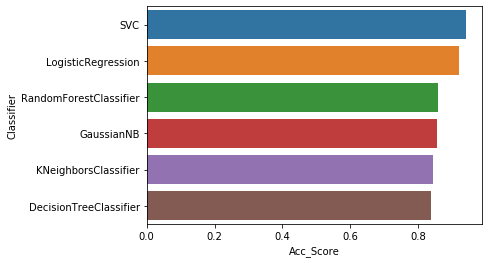

In [94]:
sns.barplot(x = 'Acc_Score', y = 'Classifier', data = ranking_alg_scores)

The most accurate algorithm was SVM

# Saving the predictive model

In [95]:
import joblib

In [96]:
final_model = SVC()

In [97]:
concat_x = pd.concat([X_train, X_test], ignore_index = True)
concat_x = concat_x.values
concat_y = pd.concat([y_train, y_test], ignore_index = True)
concat_y = concat_y.values

In [98]:
final_model.fit(concat_x, concat_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
joblib.dump(final_model, 'titanic_model_svm.sav')

['titanic_model_svm.sav']